In [39]:
import pandas as pd

df = pd.read_csv('GE.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-24,58.337238,58.446526,56.252926,58.173302,57.922203,7851377
1,2022-05-25,57.353630,58.227947,56.690086,58.181110,57.929974,9089976
2,2022-05-26,58.719749,60.663544,58.313816,60.117096,59.857605,6008274
3,2022-05-27,60.335674,61.498829,60.101482,61.483215,61.217827,6240904
4,2022-05-31,60.850899,61.701794,60.702576,61.116314,60.852509,6649671
...,...,...,...,...,...,...,...
246,2023-05-17,101.870003,103.580002,101.550003,103.470001,103.470001,5484200
247,2023-05-18,102.889999,104.279999,101.730003,104.010002,104.010002,4606800
248,2023-05-19,104.519997,105.779999,103.839996,104.260002,104.260002,5770200
249,2023-05-22,104.099998,105.940002,104.099998,104.550003,104.550003,3987300


In [40]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-05-24,58.173302
1,2022-05-25,58.181110
2,2022-05-26,60.117096
3,2022-05-27,61.483215
4,2022-05-31,61.116314
...,...,...
246,2023-05-17,103.470001
247,2023-05-18,104.010002
248,2023-05-19,104.260002
249,2023-05-22,104.550003


In [41]:
df['Date']

0      2022-05-24
1      2022-05-25
2      2022-05-26
3      2022-05-27
4      2022-05-31
          ...    
246    2023-05-17
247    2023-05-18
248    2023-05-19
249    2023-05-22
250    2023-05-23
Name: Date, Length: 251, dtype: object

In [42]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2022-05-24')
datetime_object

datetime.datetime(2022, 5, 24, 0, 0)

In [43]:
df

,Date,Close
0,2022-05-24,58.173302
1,2022-05-25,58.181110
2,2022-05-26,60.117096
3,2022-05-27,61.483215
4,2022-05-31,61.116314
...,...,...
246,2023-05-17,103.470001
247,2023-05-18,104.010002
248,2023-05-19,104.260002
249,2023-05-22,104.550003


In [44]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\Skynet\AppData\Local\Temp\ipykernel_10104\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-05-24
1     2022-05-25
2     2022-05-26
3     2022-05-27
4     2022-05-31
         ...    
246   2023-05-17
247   2023-05-18
248   2023-05-19
249   2023-05-22
250   2023-05-23
Name: Date, Length: 251, dtype: datetime64[ns]

In [45]:
df.index = df.pop('Date')
df

,Close
Date,
2022-05-24,58.173302
2022-05-25,58.181110
2022-05-26,60.117096
2022-05-27,61.483215
2022-05-31,61.116314
...,...
2023-05-17,103.470001
2023-05-18,104.010002
2023-05-19,104.260002


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

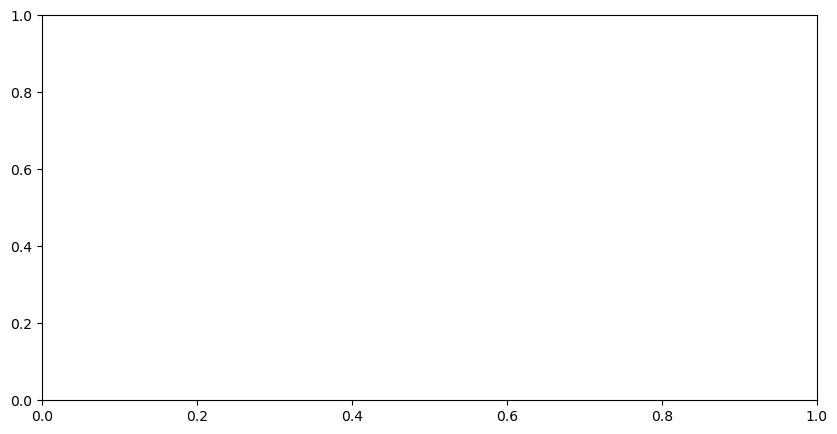

In [46]:
import matplotlib.pyplot as plt

# Plot the 'Close' prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
import matplotlib.pyplot as plt

In [49]:
print(df['Close'].dtype)

float64


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

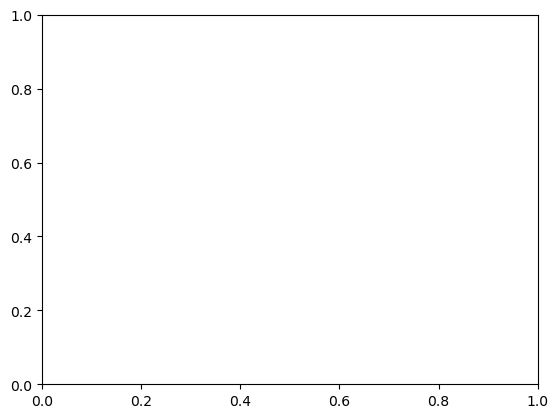

In [48]:
plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2022-05-27	', 
                                '2023-05-23', 
                                n=3)
windowed_df

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 27s 741ms/step - loss: 4165.5815 - mean_absolute_error: 63.4825 - val_loss: 8661.3789 - val_mean_absolute_error: 93.0384
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 4104.2573 - mean_absolute_error: 62.9915 - val_loss: 8594.5225 - val_mean_absolute_error: 92.6783
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 4051.3118 - mean_absolute_error: 62.5720 - val_loss: 8506.9258 - val_mean_absolute_error: 92.2045
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 3987.3779 - mean_absolute_error: 62.0549 - val_loss: 8392.3252 - val_mean_absolute_error: 91.5810
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 3899.6174 - mean_absolute_error: 61.3412 - val_loss: 8241.5371 - val_mean_absolute_error: 90.7540
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 3781.2119 - mean_absolute_error: 60.3666 - val_loss: 8037.8823 - val_mean_ab

7/7 [==============================] - 4s 4ms/step


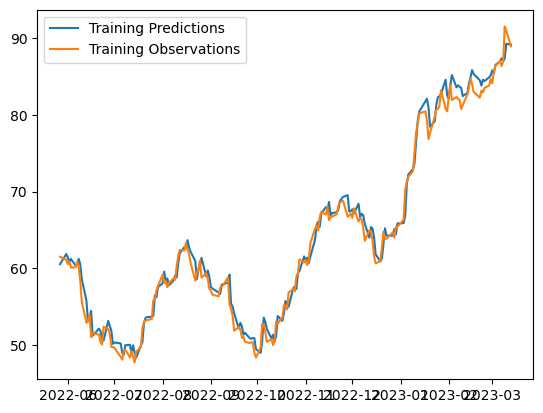

In [13]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 146ms/step


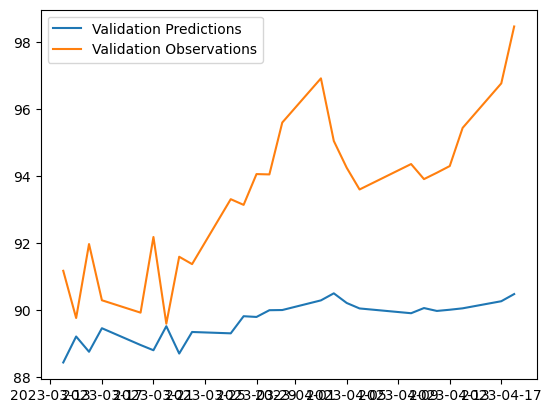

In [14]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 157ms/step


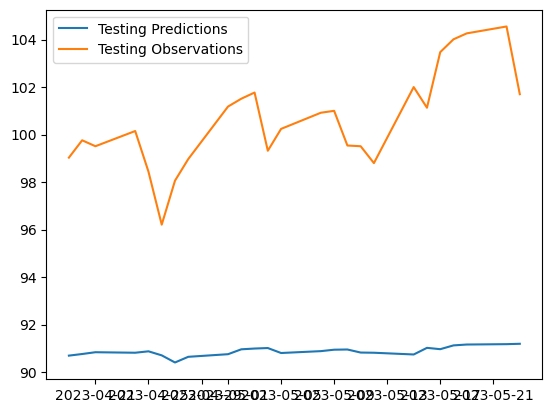

In [15]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

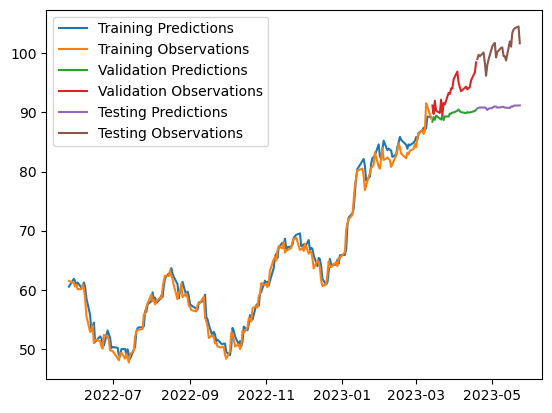

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [17]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 82ms/step


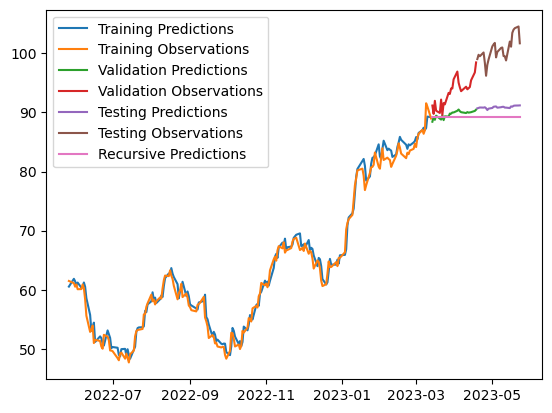

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])